# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [2]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

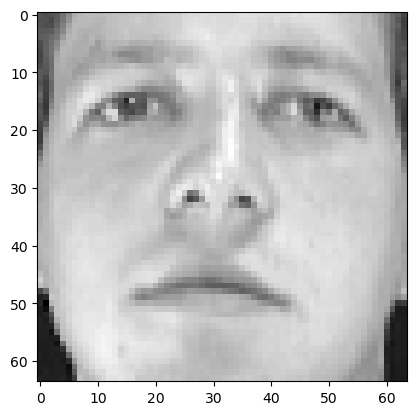

In [3]:
# Selecting an image

sample_image = X[6]
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.show()

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [4]:
# Creating the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train.shape, X_test.shape

((200, 64, 64), (200, 64, 64))

### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [5]:
# Conversion

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((200, 40), (200, 40))

### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [6]:
# Reshape
X_train = X_train.reshape(200, 64, 64, 1)
X_test = X_test.reshape(200, 64, 64, 1)

X_train.shape, X_test.shape

((200, 64, 64, 1), (200, 64, 64, 1))

## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [16]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model

model1 = Sequential()
model1.add(Conv2D(16, kernel_size=3, strides=1, activation='relu',
                 padding='same', input_shape=(64, 64, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model1.add(Flatten())
model1.add(Dense(40, activation='softmax'))

In [17]:
# Compiling model1
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=20, batch_size=10,
           validation_data=(X_test, y_test))

Epoch 1/20
20/20 [==============================] - 1s 18ms/step - loss: 4.1999 - accuracy: 0.0200 - val_loss: 3.7809 - val_accuracy: 0.0500
Epoch 2/20
20/20 [==============================] - 0s 18ms/step - loss: 3.4842 - accuracy: 0.0800 - val_loss: 3.5109 - val_accuracy: 0.0400
Epoch 3/20
20/20 [==============================] - 0s 13ms/step - loss: 3.0620 - accuracy: 0.3850 - val_loss: 3.2836 - val_accuracy: 0.3000
Epoch 4/20
20/20 [==============================] - 0s 12ms/step - loss: 2.6100 - accuracy: 0.5950 - val_loss: 2.9138 - val_accuracy: 0.4600
Epoch 5/20
20/20 [==============================] - 0s 12ms/step - loss: 1.9994 - accuracy: 0.8150 - val_loss: 2.4298 - val_accuracy: 0.5700
Epoch 6/20
20/20 [==============================] - 0s 13ms/step - loss: 1.3980 - accuracy: 0.9200 - val_loss: 1.9496 - val_accuracy: 0.6750
Epoch 7/20
20/20 [==============================] - 0s 12ms/step - loss: 0.8513 - accuracy: 0.9700 - val_loss: 1.5984 - val_accuracy: 0.7100
Epoch 8/20
20

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [9]:
# Loss and Accuracy

loss1, accuracy1 = model1.evaluate(X_test, y_test, verbose=0)

print(f"\nEvaluated Loss (model1): {loss1:.4f}")
print(f"Evaluated Accuracy (model1): {accuracy1:.4f}")


Evaluated Loss (model1): 0.5338
Evaluated Accuracy (model1): 0.8850


### Step 9: Print image

Pick one of the images from the test set, and print the image.

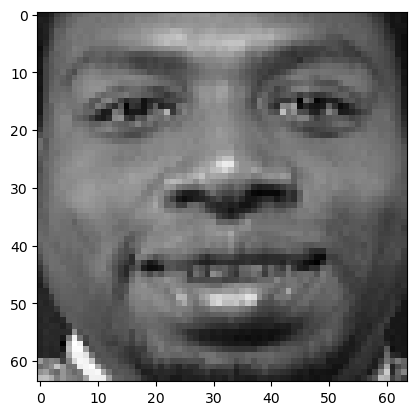

In [10]:
# An image

img2_index = 3
sample_img_test1 = X_test[img2_index, :, :, 0].reshape(64, 64)

plt.imshow(sample_img_test1, cmap=plt.cm.gray)


### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

In [11]:
layer_outputs_mod1 = [layer.output for layer in model1.layers]
layers_model1 = keras.Model(inputs=model1.layers[0].input, outputs=layer_outputs_mod1)
outputs1 = layers_model1.predict(sample_img_test1.reshape(1, 64, 64, 1))
conv_output1 = outputs1[0]
pooling_output1 = outputs1[1]

# Feature maps
def PlotFeatureMaps(output_predictions):
    n_col = 4
    n_row = 4
    plt.figure(figsize=(n_col, n_row))
    for j in range(n_row * n_col): # For loop
        plt.subplot(n_row, n_col, j + 1)
        plt.imshow(output_predictions[0, :, :, j], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show
    return None

1/1 [==============================] - 0s 100ms/step


#### Feature Maps from Convolutional Layer

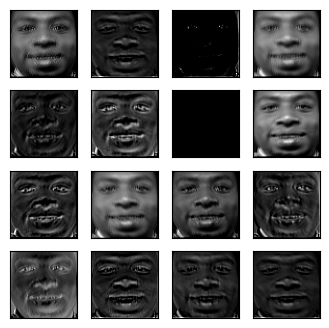

In [12]:
PlotFeatureMaps(conv_output1)

#### Feature Maps from Pooling Layer

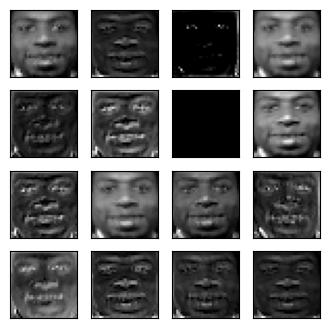

In [13]:
PlotFeatureMaps(pooling_output1)

## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [15]:
# Change model1 so that it has a window size of 9.

# Convolution Neural Network Model
input_tensor = Input(shape=(64, 64, 1))

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=9, strides=1, activation='relu',
                 padding='same', input_shape=(64, 64, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model2.add(Flatten())
model2.add(Dense(40, activation='softmax'))

In [18]:
# Compiling model2
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20, batch_size=10,
           validation_data=(X_test, y_test))

Epoch 1/20
20/20 [==============================] - 1s 24ms/step - loss: 3.8717 - accuracy: 0.0200 - val_loss: 3.6888 - val_accuracy: 0.0400
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 3.6875 - accuracy: 0.0600 - val_loss: 3.6898 - val_accuracy: 0.0300
Epoch 3/20
20/20 [==============================] - 0s 20ms/step - loss: 3.6842 - accuracy: 0.0650 - val_loss: 3.6875 - val_accuracy: 0.0400
Epoch 4/20
20/20 [==============================] - 0s 20ms/step - loss: 3.7305 - accuracy: 0.0650 - val_loss: 3.6882 - val_accuracy: 0.0500
Epoch 5/20
20/20 [==============================] - 0s 21ms/step - loss: 3.6714 - accuracy: 0.0850 - val_loss: 3.6880 - val_accuracy: 0.0350
Epoch 6/20
20/20 [==============================] - 0s 19ms/step - loss: 3.6652 - accuracy: 0.0500 - val_loss: 3.6870 - val_accuracy: 0.0600
Epoch 7/20
20/20 [==============================] - 0s 20ms/step - loss: 3.6417 - accuracy: 0.1050 - val_loss: 3.6890 - val_accuracy: 0.0650
Epoch 8/20
20

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [19]:
# Loss and Accuracy
loss2, accuracy2 = model2.evaluate(X_test, y_test, verbose=0)

print(f"\nEvaluated Loss (model2): {loss2:.4f}")
print(f"Evaluated Accuracy (model2): {accuracy2:.4f}")


Evaluated Loss (model2): 0.7025
Evaluated Accuracy (model2): 0.8200


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

In [20]:
# Feature maps
layer_outputs_mod2 = [layer.output for layer in model2.layers]
layers_model2 = keras.Model(inputs=model2.layers[0].input, outputs=layer_outputs_mod2)
outputs2 = layers_model2.predict(sample_img_test1.reshape(1, 64, 64, 1))
conv_output2 = outputs2[0]
pooling_output2 = outputs2[1]


1/1 [==============================] - 0s 99ms/step


#### Feature Maps from Convolutional Layer

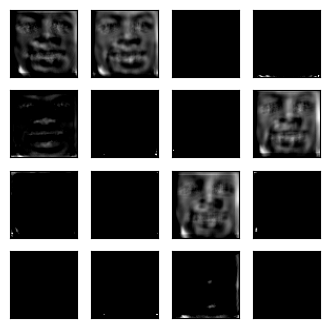

In [21]:
PlotFeatureMaps(conv_output2)

#### Feature Maps from Pooling Layer

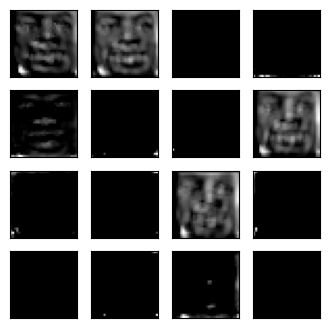

In [22]:
PlotFeatureMaps(pooling_output2)

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [ ]:
# Convolution Neural Network Model


In [ ]:
# Compiling model3


### Step 16: Reflection on Model 3

Write a few sentences describing how you optimized the model in this part. What worked well?